# T1.3

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

Enunciado: A partir de dados de pobreza e de educação, criem alguns modelos de regressão linear (variando as features) para tentar prever a população carcerária de cada país. Avaliem os modelos e indique qual foi o melhor.

## Setup

In [1]:
from IPython.display import display, Markdown, Latex
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

## Desigualdade

In [2]:
years = [str(item) for item in list(range(2010, 2018))] + ['Country']
df_inequality = pd.read_csv("datasets/Coefficient of Human Inequality.csv", encoding = "ISO-8859-1", skiprows=1, usecols=years).set_index("Country", drop = True)
df_inequality.head(5)

,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,
Afghanistan,NaN,NaN,NaN,30.0,30.0,30.4,28.2,28.2
Albania,12.7,13.8,13.8,13.4,13.4,13.4,12.2,10.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1
Angola,38.8,NaN,43.6,43.6,36.6,36.6,32.3,32.3
Argentina,19.0,18.7,18.7,15.3,14.6,15.2,14.0,13.9


## Educação

In [3]:
years = [str(item) for item in list(range(1990, 2018))] + ['Country']
df_education = pd.read_csv("datasets/Education Index.csv",  encoding = "ISO-8859-1", skiprows=1, usecols=years).set_index("Country", drop = True)
df_education.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,0.213,0.224,...,0.347,0.359,0.371,0.382,0.390,0.398,0.406,0.410,0.410,0.415
Albania,0.584,0.589,0.558,0.543,0.542,0.551,0.558,0.571,0.580,0.586,...,0.646,0.652,0.673,0.693,0.730,0.732,0.733,0.733,0.742,0.745
Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,0.487,...,0.588,0.608,0.626,0.644,0.652,0.660,0.661,0.662,0.663,0.664
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.661,0.661,0.662,0.663,0.715,0.715,0.716,0.715,0.714,0.714
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276,...,0.390,0.404,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498


## Pobreza

In [4]:
years = [str(item) for item in list(range(2006, 2018))] + ['Country']
df_poverty = pd.read_csv("datasets/Multidimensional poverty index (MPI).csv",  encoding = "ISO-8859-1", skiprows=1, usecols=years).set_index("Country", drop = True)
df_poverty.head(5)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.273,NaN
Albania,NaN,NaN,NaN,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.283,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001,NaN


In [5]:
df_poverty.describe

<bound method NDFrame.describe of                                              2006   2007   2008   2009   2010  \
Country                                                                         
 Afghanistan                                  NaN    NaN    NaN    NaN    NaN   
 Albania                                      NaN    NaN    NaN  0.008    NaN   
 Algeria                                      NaN    NaN    NaN    NaN    NaN   
 Angola                                       NaN    NaN    NaN    NaN    NaN   
 Armenia                                      NaN    NaN    NaN    NaN    NaN   
 Azerbaijan                                 0.019    NaN    NaN    NaN    NaN   
 Bangladesh                                   NaN    NaN    NaN    NaN    NaN   
 Barbados                                     NaN    NaN    NaN    NaN    NaN   
 Belize                                       NaN    NaN    NaN    NaN    NaN   
 Benin                                        NaN    NaN    NaN    NaN    N

In [6]:
df_poverty.loc[" Brazil", : ]

2006      NaN
2007      NaN
2008      NaN
2009      NaN
2010      NaN
2011      NaN
2012      NaN
2013      NaN
2014      NaN
2015    0.016
2016      NaN
2017      NaN
Name:  Brazil, dtype: float64

Não existem dados suficientes na base de dados sobre a pobreza, então não vamos analisa-la

# Brasil

## Pop Carcerária BRASIL

In [7]:
df_prison = pd.read_csv("datasets/pop_carceraria_brasil.csv",  encoding = "ISO-8859-1").set_index("Country", drop = True)
df_prison.head()

,2000,2002,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,
Brazil,232775,239345,336358,401236,422400,451429,473600,496251,514600,548003,581500,622202,698600,726712


Preenchendo dados que faltam com média

In [8]:
df_prison.insert(1, '2001', int((df_prison['2000'] + df_prison['2002'])/2))
df_prison.insert(3, '2003', int((df_prison['2002'] + df_prison['2004'])/2))
df_prison.insert(5, '2005', int((df_prison['2004'] + df_prison['2006'])/2))
df_prison.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,
Brazil,232775,236060,239345,287851,336358,368797,401236,422400,451429,473600,496251,514600,548003,581500,622202,698600,726712


In [9]:
df_prison.loc["Brazil", : ]

2000    232775
2001    236060
2002    239345
2003    287851
2004    336358
2005    368797
2006    401236
2007    422400
2008    451429
2009    473600
2010    496251
2011    514600
2012    548003
2013    581500
2014    622202
2015    698600
2016    726712
Name: Brazil, dtype: int64

## Educação BRASIL

In [10]:
df_education.loc[" Brazil", :]

1990    0.463
1991    0.475
1992    0.487
1993    0.499
1994    0.511
1995    0.523
1996    0.535
1997    0.547
1998    0.559
1999    0.572
2000    0.584
2001    0.597
2002    0.610
2003    0.595
2004    0.593
2005    0.593
2006    0.589
2007    0.588
2008    0.608
2009    0.610
2010    0.619
2011    0.622
2012    0.630
2013    0.655
2014    0.664
2015    0.680
2016    0.686
2017    0.686
Name:  Brazil, dtype: float64

## Desigualdade BRASIL

In [11]:
df_inequality.loc[" Brazil", :]

2010    26.6
2011    26.9
2012    26.5
2013    26.3
2014    25.6
2015    25.0
2016    23.6
2017    23.2
Name:  Brazil, dtype: float64

# Prever pop carcerária 2016 usando educação (2000 até 2015)

In [12]:
df = pd.DataFrame()
# variavel preditora
df['x'] = df_education.loc[" Brazil", '2000':'2015'].values
# variavel alvo
df['y'] = df_prison.loc["Brazil", '2000':'2015'].values
df.head(20)

,x,y
0,0.584,232775
1,0.597,236060
2,0.610,239345
3,0.595,287851
4,0.593,336358
5,0.593,368797
6,0.589,401236
7,0.588,422400
8,0.608,451429
9,0.610,473600


In [13]:
x_v = df[['x']]
y_v = df[['y']]

Gráfico de dispersão educação x pop. carcerária

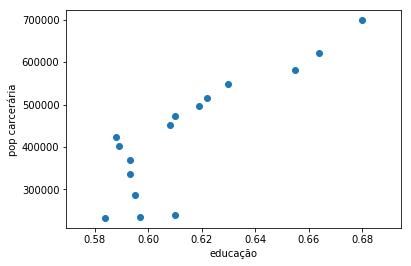

In [14]:
plt.scatter(x_v, y_v)
plt.xlabel("educação")
plt.ylabel("pop carcerária")
plt.show()

A população carcerária só aumentou ao longo dos anos e a educação também, o que reflete no grafico

In [15]:
# Modelo
reg = LinearRegression()
reg.fit(x_v, y_v)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
score = reg.score(x_v, y_v)
score

0.7227148560753425

In [18]:
result = reg.predict(df_education.loc[" Brazil", '2016'].reshape(-1, 1))
result

array([[729456.59612644]])

In [19]:
df_final = pd.DataFrame([["educacao",result[0][0], score ,df_prison.loc["Brazil", '2016'], result[0][0] - df_prison.loc["Brazil", '2016'], '2000-2015']], columns=['dados', 'predict result', 'score', 'real', 'predict - real', 'tempo'])
df_final

,dados,predict result,score,real,predict - real,tempo
0,educacao,729456.596126,0.722715,726712,2744.596126,2000-2015


# Prever pop carcerária 2016 usando desigualdade (2010 até 2015)

In [20]:
df2 = pd.DataFrame()
# variavel preditora
df2['x'] = df_inequality.loc[" Brazil", '2010':'2015'].values
# variavel alvo
df2['y'] = df_prison.loc["Brazil", '2010':'2015'].values
df2.head(10)

,x,y
0,26.6,496251
1,26.9,514600
2,26.5,548003
3,26.3,581500
4,25.6,622202
5,25.0,698600


In [21]:
x_v2 = df2[['x']]
y_v2 = df2[['y']]

Gráfico de dispersão pop. carcerária x desigualdade

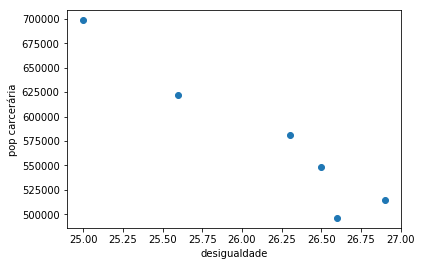

In [22]:
plt.scatter(x_v2, y_v2)
plt.xlabel("desigualdade")
plt.ylabel("pop carcerária")
plt.show()

A população carcerária só aumentou ao longo dos anos enquanto a desigualdade diminui e isso reflete no gráfico de dispersão

In [23]:
# Modelo
reg2 = LinearRegression()
reg2.fit(x_v2, y_v2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
score = reg2.score(x_v2, y_v2)
score

0.9293096019123954

In [26]:
result = reg2.predict(df_inequality.loc[" Brazil", '2016'].reshape(-1, 1))
result

array([[835693.99013807]])

In [27]:
temp = pd.DataFrame([["desigualdade",result[0][0],score ,df_prison.loc["Brazil", '2016'], result[0][0] - df_prison.loc["Brazil", '2016'], '2010-2015']], columns=['dados', 'predict result', 'score', 'real', 'predict - real', 'tempo'])
df_final = df_final.append(temp, ignore_index=True)
df_final

,dados,predict result,score,real,predict - real,tempo
0,educacao,729456.596126,0.722715,726712,2744.596126,2000-2015
1,desigualdade,835693.990138,0.929310,726712,108981.990138,2010-2015


A previsão com a desigualdade foi consideravelmente pior, provavelmente pela falta de dados.
Apesar disso o score apareceu bom.

# Prever pop carcerária 2016 usando desigualdade e educação (2010 até 2015)

In [28]:
df3 = pd.DataFrame()
# variavel preditora
df3['x1'] = df_inequality.loc[" Brazil", '2010':'2015'].values
df3['x2'] = df_education.loc[" Brazil", '2010':'2015'].values
# variavel alvo
df3['y'] = df_prison.loc["Brazil", '2010':'2015'].values
df3.head(10)

,x1,x2,y
0,26.6,0.619,496251
1,26.9,0.622,514600
2,26.5,0.630,548003
3,26.3,0.655,581500
4,25.6,0.664,622202
5,25.0,0.680,698600


In [29]:
x_v3 = df3.drop('y',axis=1)
y_v3 = df3[['y']]

In [30]:
# Modelo
reg3 = LinearRegression()
reg3.fit(x_v3, y_v3)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
score = reg3.score(x_v3, y_v3)
score

0.9714653805789263

In [32]:
predict_array = np.array([df_inequality.loc[" Brazil", '2016'], df_education.loc[" Brazil", '2016']])
result = reg3.predict(predict_array.reshape(1, -1))
result

array([[759164.46867515]])

## Resultado Final

In [33]:
temp = pd.DataFrame([["desigualdade + educação",result[0][0],score ,df_prison.loc["Brazil", '2016'], result[0][0] - df_prison.loc["Brazil", '2016'], '2010-2015']], columns=['dados', 'predict result', 'score', 'real', 'predict - real', 'tempo'])
df_final = df_final.append(temp, ignore_index=True)
df_final

,dados,predict result,score,real,predict - real,tempo
0,educacao,729456.596126,0.722715,726712,2744.596126,2000-2015
1,desigualdade,835693.990138,0.929310,726712,108981.990138,2010-2015
2,desigualdade + educação,759164.468675,0.971465,726712,32452.468675,2010-2015


No final, o de educaçao conseguiu a melhor previsão provavelmente pelo fato de ter mais dados, já a desigualdade com a educação ficou em segundo pois são duas features para previsão ao invés de 1 como no caso da previsão com desigualdade, que utiliza o mesmo periodo da desigualdade+educação mas por ter somente uma feature, ficou em terceiro.